In [1]:
import pandas as pd

In [36]:
prvo=pd.read_csv("all_songs_1_claude_example_idf_styles_with_perplexity.csv")
prvo['ms'].sum()
prvo['perplexity'].mean()

np.float64(40.459680186598575)

In [6]:
prvo

,author,song_title,styles_to_apply,name_of_new_song,new_song,input_tokens,output_tokens,total_tokens,ms,perplexity
0,Петре М. Андреевски,ПЕТТО ПИСМО,Фигуративен јазик\nФрагмент од реченица\nДолга...,Оти таа беше меѓу сите,Оти таа беше меѓу сите\n\nОти таа беше меѓу си...,1145,319,1464,3676,33.310551
1,Петре М. Андреевски,1903,Фигуративен јазик\nФрагмент од реченица\nДолга...,Ехо на споменот,"Ехо на споменот\n\nЖивотот како сенка избледе,...",1077,406,1483,5139,21.491814
2,Петре М. Андреевски,ПРВО ПИСМО,Фигуративен јазик\nФрагмент од реченица\nДолга...,Во сенка на неповрат,Во сенка на неповрат\n\nБеше тогаш кога сите д...,1152,333,1485,4445,46.736248
3,Петре М. Андреевски,ПЕСНА ЗА НЕЈЗИНАТА ПЕСНА,Фигуративен јазик\nФрагмент од реченица\nДолга...,Месечината и Јас,"Месечината и Јас\n\nВо ноќта сјајна, месечина ...",924,416,1340,4910,25.855577
4,Петре М. Андреевски,УШТЕ ЕДНИ ПОДАТОЦИ ЗА ДЕНИЦИЈА,Фигуративен јазик\nФрагмент од реченица\nДолга...,Дамарот на срцето,"Дамарот на срцето\n\nПред неа, животот нејзин\...",921,251,1172,3478,35.507175
...,...,...,...,...,...,...,...,...,...,...
1194,Ристо Лазаров,СЕКОГАШ,Фигуративен јазик\nФрагмент од реченица\nДолга...,Волшебство меѓу две,"Волшебство меѓу две\n\nСреде светот, две сме н...",1014,314,1328,3562,36.695976
1195,Ристо Лазаров,ГРОБИШТАТА РЕКОЛЕТА,Фигуративен јазик\nФрагмент од реченица\nДолга...,Во средината на ноќта,"Во средината на ноќта\n\nСреде оваа ноќ, кога ...",650,371,1021,4350,29.069963
1196,Ристо Лазаров,СРЕБРЕНАТА РЕКА,Фигуративен јазик\nФрагмент од реченица\nАктив...,Изгубена време,Изгубена време\n\nСреде забежани секундарни ти...,661,270,931,3434,43.924839
1197,Ристо Лазаров,КАТАДЕН,Фигуративен јазик\nФрагмент од реченица\nДолга...,Среде Сенките,"Среде Сенките\n\nСреде сенките што ме кријат,\...",699,355,1054,4309,50.797077


In [9]:
import os
import pandas as pd
import glob

# Пат до фолдерот
path = '/home/ivan/Desktop/Diplomska/final_results_csv'

# Најди сите CSV што почнуваат со 'all_songs'
csv_files = glob.glob(os.path.join(path, 'all_songs*.csv'))
csv_files.sort()  # Сортирај ги фајловите по име (за предвидлив редослед)

print(f"Пронајдени {len(csv_files)} CSV фајлови")

# Резултати по модел
results = {}

# Суми за сè
total_input_all = 0
total_output_all = 0
total_tokens_all = 0
total_ms_all = 0
total_perplexity_sum = 0
total_rows_all = 0

for file in csv_files:
    df = pd.read_csv(file)
    
    # Пресметки
    total_input = df['input_tokens'].sum()
    total_output = df['output_tokens'].sum()
    total_tokens = total_input + total_output
    total_ms = df['ms'].sum()
    avg_perplexity = df['perplexity'].mean()
    
    # Име на моделот од фајлот
    model_name = os.path.basename(file).replace('all_songs_', '').replace('.csv', '')
    
    results[model_name] = {
        'total_input': total_input,
        'total_output': total_output,
        'total_tokens': total_tokens,
        'total_ms': total_ms,
        'avg_perplexity': avg_perplexity
    }
    
    # Акчумулирај за вкупно
    total_input_all += total_input
    total_output_all += total_output
    total_tokens_all += total_tokens
    total_ms_all += total_ms
    total_perplexity_sum += (avg_perplexity * len(df))
    total_rows_all += len(df)

# --- ПЕЧАТЕЊЕ СО АЗБУЧНО СОРТИРАЊЕ ---
print("\nРЕЗУЛТАТИ ПО МОДЕЛ (сортирано азбучно):")
print("Модел" + " " * 50 + "Вкупно Input  Вкупно Output  Вкупно Tokens   Вкупно ms  Прос. Perplexity")
print("-" * 120)

# Сортирај ги моделите по име (азбучно)
for model in sorted(results.keys()):
    vals = results[model]
    print(f"{model:<60} {vals['total_input']:>12} {vals['total_output']:>13} {vals['total_tokens']:>13} {vals['total_ms']:>11} {vals['avg_perplexity']:>16.4f}")

# --- ВКУПНО ЗА СИТЕ ---
overall_avg_perplexity = total_perplexity_sum / total_rows_all if total_rows_all > 0 else 0

print("\n" + "="*120)
print(f"СУМИРАЊЕ ЗА СИТЕ ({len(csv_files)} модели):")
print(f"Вкупно Input:      {total_input_all:,}")
print(f"Вкупно Output:     {total_output_all:,}")
print(f"Вкупно Tokens:     {total_tokens_all:,}")
print(f"Вкупно ms:         {total_ms_all:,}")
print(f"Просечна Perplexity (пондерирана): {overall_avg_perplexity:,.4f}")
print("="*120)

Пронајдени 18 CSV фајлови

РЕЗУЛТАТИ ПО МОДЕЛ (сортирано азбучно):
Модел                                                  Вкупно Input  Вкупно Output  Вкупно Tokens   Вкупно ms  Прос. Perplexity
------------------------------------------------------------------------------------------------------------------------
1_claude_example_idf_styles_with_perplexity                        896151        373378       1269529     4871520          40.4597
1_nova_idf_styles_examples_with_perplexity                         907854        573153       1481007     3666062          91.9534
2_claude_idf_styles_with_perplexity                                538521        351440        889961     6157609          41.2942
2_nova_idf_styles_with_perplexity                                  528041        549029       1077070     3572594         102.5512
3_claude_idf_with_perplexity                                       272410        243824        516234     3066880          36.1664
3_nova_idf_with_perplexity   

In [19]:
import matplotlib.pyplot as plt

# --- МАТРИЦА: 18 реда × 6 колони ---
data = [
    ["C Raw author", 393785, 320499, 714284, 5606196, 37.1710],
    ["N Raw author", 406508, 501410, 907918, 3459656, 61.5650],
    ["C Styles", 459641, 339613, 799254, 5372628, 45.0785],
    ["N Styles", 458232, 684780, 1143012, 4351610, 59.7057],
    ["C TF-IDF", 272410, 243824, 516234, 3066880, 36.1664],
    ["N TF-IDF", 282032, 405645, 687677, 2614364, 44.0289],
    ["C Styles +TF-IDF", 538521, 351440, 889961, 6157609, 41.2942],
    ["N Styles +TF-IDF", 528041, 549029, 1077070, 3572594, 102.5512],
    ["C Styles +TF-IDF Example song", 896151, 373378, 1269529, 4871520, 40.4597],
    ["N Styles +TF-IDF Example song", 907854, 573153, 1481007, 3666062, 91.9534],
    ["C Dictionary", 7738305, 284040, 8022345, 4106176, 40.3331],
    ["N Dictionary", 7697113, 511404, 8208517, 4179527, 16.7603],
    ["C Dictionary (MACEDONIZER)", 7653971, 292897, 7946868, 5076036, 38.4297],
    ["N Dictionary (MACEDONIZER)", 7915877, 509332, 8425209, 4349469, 18.6218],
    ["C Styles +TF-IDF RAG Example", 1093962, 358638, 1452600, 7394720, 38.9111],
    ["N Styles +TF-IDF RAG Example", 1043747, 580743, 1624490, 3733531, 19.1701],
    ["C Styles +TF-IDF RAG Example (MACEDONIZER)", 1070065, 368942, 1439007, 5057655, 37.7987],
    ["N Styles +TF-IDF RAG Example (MACEDONIZER)", 1034479, 564602, 1599081, 3671399, 19.9278]
]

# --- Поделба на C и N ---
c_names, c_ppl = [], []
n_names, n_ppl = [], []

for row in data:
    name, _, _, _, _, ppl = row
    if name.startswith("C "):
        c_names.append(name[2:])  # без "C "
        c_ppl.append(ppl)
    elif name.startswith("N "):
        n_names.append(name[2:])  # без "N "
        n_ppl.append(ppl)

# --- Една слика, две линии ---
plt.figure(figsize=(14, 8))

plt.plot(c_names, c_ppl, 'o-', color='tab:blue', label='Claude (C)', linewidth=2.5, markersize=7)
plt.plot(n_names, n_ppl, 's--', color='tab:red', label='Nova (N)', linewidth=2.5, markersize=7)

plt.title("Perplexity: Claude (C) vs Nova (N) по експеримент", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Perplexity", fontsize=13)
plt.xlabel("Експеримент", fontsize=13)
plt.xticks(rotation=50, ha='right', fontsize=9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig("perplexity_C_vs_N.png", dpi=300, bbox_inches='tight')
plt.close()

print("Зачувано: perplexity_C_vs_N.png")
print("Готово. Една слика. Две линии. C (сина) и N (црвена).")

Зачувано: perplexity_C_vs_N.png
Готово. Една слика. Две линии. C (сина) и N (црвена).


In [35]:
cleaned=pd.read_csv('cleaned_songs_with_perplexity.csv')
print(cleaned['perplexity'].mean())


52.06126137541372


All songs 

In [29]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_perplexity_kde_by_model():
    # --- ПАТ ДО ФОЛДЕР ---
    folder_path = "."  # <-- ТУКА СЕ ФАЈЛОВИТЕ

  

    all_csv = glob.glob(os.path.join(folder_path, "*.csv"))
    print(f"Вкупно CSV фајлови во '{folder_path}': {len(all_csv)}")
    if not all_csv:
        print("   Нема CSV фајлови во папката!")
        return

    print("\nПронајдени фајлови:")
    for f in all_csv:
        print(f"   • {os.path.basename(f)}")

    nova_files = [f for f in all_csv if "nova" in f.lower()]
    claude_files = [f for f in all_csv if "claude" in f.lower()]
    cleaned_file = next((f for f in all_csv if "cleaned_songs_with_perplexity.csv" in f.lower()), None)

    print(f"\nФилтрирани:")
    print(f"   Nova: {len(nova_files)} фајлови")
    print(f"   Claude: {len(claude_files)} фајлови")
    print(f"   Cleaned: {'Да' if cleaned_file else 'Нема'}")

    def read_perplexity(files):
        data = []
        for file in files:
            try:
                df = pd.read_csv(file)
                ppl_col = next((col for col in df.columns if 'perplexity' in col.lower()), None)
                if ppl_col:
                    values = df[ppl_col].dropna()
                    data.extend(values.tolist())
                    print(f"     {os.path.basename(file)} → {len(values)} песни")
                else:
                    print(f"     {os.path.basename(file)} → нема perplexity колона")
            except Exception as e:
                print(f"     Грешка при читање {file}: {e}")
        return data

    # --- Собери податоци ---
    nova_data = read_perplexity(nova_files)
    claude_data = read_perplexity(claude_files)
    cleaned_data = read_perplexity([cleaned_file]) if cleaned_file else []

    if not (nova_data or claude_data or cleaned_data):
        print("Нема податоци за perplexity!")
        return

    # --- Плотирај ---
    plt.figure(figsize=(12, 7))

    if nova_data:
        sns.kdeplot(data=nova_data, label="Nova", color='tab:red', linewidth=2.5)
    if claude_data:
        sns.kdeplot(data=claude_data, label="Claude", color='tab:blue', linewidth=2.5)
    if cleaned_data:
        sns.kdeplot(data=cleaned_data, label="Cleaned Songs", color='tab:green', linewidth=2.5, linestyle='--')

    plt.title("Perplexity Distribution (KDE)", fontsize=16, fontweight='bold')
    plt.xlabel("Perplexity")
    plt.ylabel("Density")
    plt.xlim(0, 130)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig("perplexity_kde.png", dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\nЗачувано: perplexity_kde.png")
    print(f"   • Nova: {len(nova_data)} песни")
    print(f"   • Claude: {len(claude_data)} песни")
    print(f"   • Cleaned: {len(cleaned_data)} песни")

Вкупно CSV фајлови во '.': 24

Пронајдени фајлови:
   • all_songs_3_nova_idf_with_perplexity.csv
   • semantic_search_log.csv
   • api_styles_all_in_one_text.csv
   • all_songs_5_claude_raw_author_with_perplexity.csv
   • cleaned_songs_with_perplexity.csv
   • all_songs_9_nova_idf_styles_explanatory_dictionary_makedonizer_with_perplexity.csv
   • all_songs_8_claude_idf_styles_rag_example_makedonizer_with_perplexity.csv
   • all_songs_8_nova_idf_styles_rag_example_makedonizer_with_perplexity.csv
   • all_songs_2_claude_idf_styles_with_perplexity.csv
   • all_songs_4_nova_styles_with_perplexity.csv
   • all_songs_1_nova_idf_styles_examples_with_perplexity.csv
   • all_songs_1_claude_example_idf_styles_with_perplexity.csv
   • all_songs_4_claude_styles_with_perplexity.csv
   • all_songs_3_claude_idf_with_perplexity.csv
   • all_songs_6_nova_explanatory_dictionary_with_perplexity.csv
   • all_songs_7_claude_idf_styles_rag_example_with_perplexity.csv
   • all_songs_6_claude_explanatory_dict

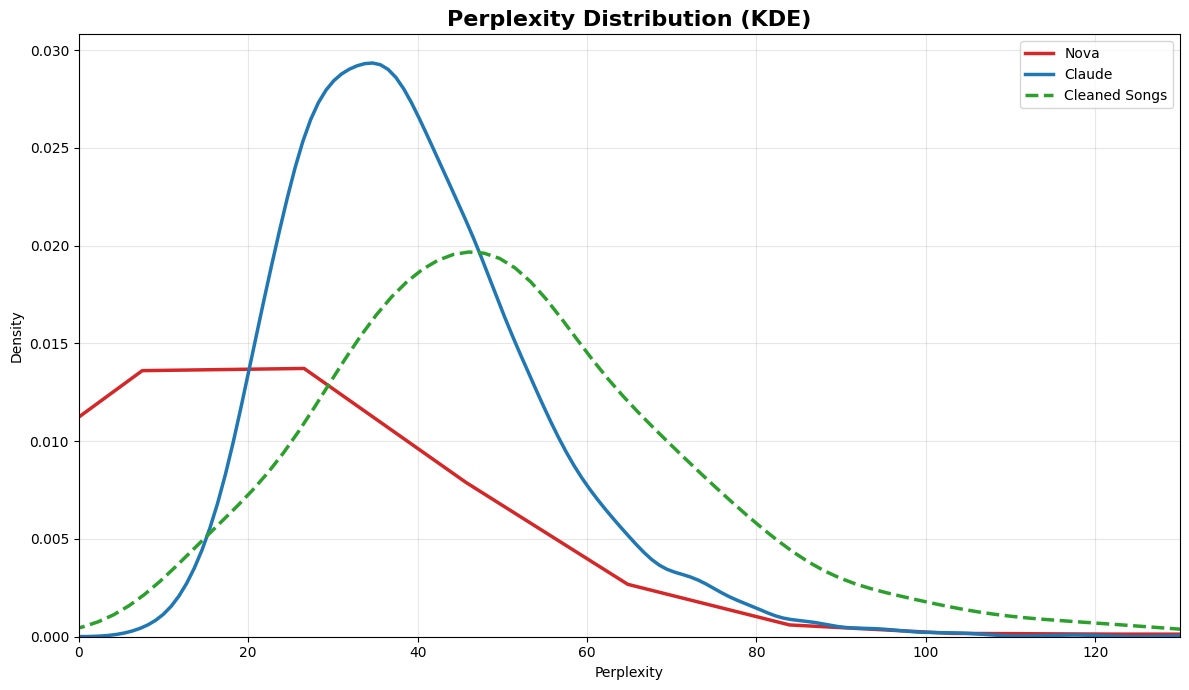


Зачувано: perplexity_kde.png
   • Nova: 10583 песни
   • Claude: 10801 песни
   • Cleaned: 1199 песни


In [30]:
plot_perplexity_kde_by_model()

In [33]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

def plot_perplexity_kde_by_model():
    folder_path = "."  # Тековна папка
    all_csv = glob.glob(os.path.join(folder_path, "*.csv"))
    
    if not all_csv:
        print("Нема CSV фајлови!")
        return

    # --- Филтрирај ---
    nova_files = {f for f in all_csv if "nova" in f.lower()}
    claude_files = {f for f in all_csv if "claude" in f.lower()}
    cleaned_file = next((f for f in all_csv if "cleaned_songs_with_perplexity" in f.lower()), None)

    # --- Парсирај број од име ---
    def get_number(fname):
        match = re.search(r'all_songs_(\d+)', fname)
        return int(match.group(1)) if match else None

    # --- Групирај по број ---
    pairs = {}
    for f in nova_files | claude_files:
        num = get_number(f)
        if num:
            pairs.setdefault(num, {'nova': None, 'claude': None})
            if 'nova' in f.lower():
                pairs[num]['nova'] = f
            elif 'claude' in f.lower():
                pairs[num]['claude'] = f

    # --- Читај cleaned ---
    cleaned_data = []
    if cleaned_file:
        try:
            df = pd.read_csv(cleaned_file)
            ppl_col = next((c for c in df.columns if 'perplexity' in c.lower()), None)
            if ppl_col:
                cleaned_data = df[ppl_col].dropna().tolist()
                print(f"Cleaned: {len(cleaned_data)} песни")
        except Exception as e:
            print(f"Грешка при cleaned: {e}")

    # --- Плотирај секој пар ---
    print(f"\nПлотирање на {len(pairs)} парови...")
    for num in sorted(pairs.keys()):
        pair = pairs[num]
        nova_file = pair['nova']
        claude_file = pair['claude']

        nova_data = claude_data = None

        # Читај Nova
        if nova_file:
            try:
                df = pd.read_csv(nova_file)
                ppl_col = next((c for c in df.columns if 'perplexity' in c.lower()), None)
                if ppl_col:
                    nova_data = df[ppl_col].dropna().tolist()
                    print(f"  {num}: Nova → {len(nova_data)} песни")
            except Exception as e:
                print(f"  Грешка Nova {num}: {e}")

        # Читај Claude
        if claude_file:
            try:
                df = pd.read_csv(claude_file)
                ppl_col = next((c for c in df.columns if 'perplexity' in c.lower()), None)
                if ppl_col:
                    claude_data = df[ppl_col].dropna().tolist()
                    print(f"  {num}: Claude → {len(claude_data)} песни")
            except Exception as e:
                print(f"  Грешка Claude {num}: {e}")

        # Пресметај ако има податоци
        if not nova_data and not claude_data:
            continue

        # --- Плотирај ---
        plt.figure(figsize=(11, 6))
        if nova_data:
            sns.kdeplot(data=nova_data, label=f"Nova #{num}", color='tab:red', linewidth=2.5)
        if claude_data:
            sns.kdeplot(data=claude_data, label=f"Claude #{num}", color='tab:blue', linewidth=2.5)
        if cleaned_data:
            sns.kdeplot(data=cleaned_data, label="Cleaned Songs", color='tab:green', linestyle='--', linewidth=2)

        plt.title(f"Perplexity KDE — Pair #{num}", fontsize=15, fontweight='bold')
        plt.xlabel("Perplexity")
        plt.ylabel("Density")
        plt.xlim(0, 130)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=10)
        plt.tight_layout()
        
        plt.savefig(f"perplexity_kde_pair_{num}.png", dpi=300, bbox_inches='tight')
        plt.close()

        print(f"  Зачувано: perplexity_kde_pair_{num}.png")

    print(f"\nГотово! {len(pairs)} графикони зачувани.")
plot_perplexity_kde_by_model()

Cleaned: 1199 песни

Плотирање на 9 парови...
  1: Nova → 1199 песни
  1: Claude → 1199 песни
  Зачувано: perplexity_kde_pair_1.png
  2: Nova → 1199 песни
  2: Claude → 1212 песни
  Зачувано: perplexity_kde_pair_2.png
  3: Nova → 1199 песни
  3: Claude → 1199 песни
  Зачувано: perplexity_kde_pair_3.png
  4: Nova → 1199 песни
  4: Claude → 1198 песни
  Зачувано: perplexity_kde_pair_4.png
  5: Nova → 1199 песни
  5: Claude → 1199 песни
  Зачувано: perplexity_kde_pair_5.png
  6: Nova → 1168 песни
  6: Claude → 1198 песни
  Зачувано: perplexity_kde_pair_6.png
  7: Nova → 1122 песни
  7: Claude → 1198 песни
  Зачувано: perplexity_kde_pair_7.png
  8: Nova → 1132 песни
  8: Claude → 1199 песни
  Зачувано: perplexity_kde_pair_8.png
  9: Nova → 1166 песни
  9: Claude → 1199 песни
  Зачувано: perplexity_kde_pair_9.png

Готово! 9 графикони зачувани.
